In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import requests
import re
import pandas as pd
import nltk
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
import os
from nltk.stem.snowball import FrenchStemmer


In [23]:
with open(r'C:\Users\razqi\OneDrive\Desktop\projet bigdata\stopwords.txt', encoding="utf8") as file:
         stopwords = file.read().split('\n')

In [24]:
#function whish clean data
def text_fr_clean(raw_tweet):
    stemmer = FrenchStemmer()    
    letters_only = re.sub('[^Aa-z-Zéàçèû ]', "", raw_tweet) 
    words = letters_only.split()                             
    #Removing stop words: 
    meaningful_words = [w for w in words if not w in stopwords]
    stem_words = [stemmer.stem(w) for w in meaningful_words]
    return( " ".join( stem_words ))
    return( " ".join( meaningful_words ))

In [34]:
#show our BD
data = pd.read_csv(r'C:\Users\razqi\OneDrive\Desktop\projet bigdata\tweetfile.csv')
data.apply(lambda x: x.astype(str).str.lower())
data = data[['text']]
data = data.dropna()

In [26]:
#cleaning data
data['text'] = data['text'].apply(lambda x: text_fr_clean(x))
data_list = data.text.tolist()
data_list = [x.split() for x in data_list]
data_list

[['épisod',
  'chef',
  'def',
  'relev',
  'invent',
  'fromag',
  'dessert',
  'premi',
  'imag'],
 ['mallory',
  'gratien',
  'séduit',
  'jury',
  'retrouv',
  'résum',
  'épisod',
  'chef'],
 ['choc', 'demi-final', 'coup', 'suiv', 'suit', 'direct'],
 ['lyon-psg',
  'choc',
  'demi-final',
  'coup',
  'coup',
  'denvoi',
  'retrouv',
  'programm',
  'complet'],
 ['fac',
  'inquiétud',
  'coronavirus',
  'air',
  'promet',
  'client',
  'pourront',
  'report',
  'annul',
  'frais',
  'voyag',
  'réserv',
  'prévus',
  'prochain',
  'infos'],
 ['départ',
  'savoi',
  'touch',
  'posit',
  'coronavirus',
  'signal',
  'lagenc',
  'régional',
  'sant',
  'hospitalis',
  'chambéry'],
 ['foi',
  'contamin',
  'trouv',
  'mulhous',
  'malad',
  'particip',
  'rassembl',
  'religi',
  'fin',
  'regroup',
  'milli'],
 ['lambert',
  'wilson',
  'incarn',
  'général',
  'gaull',
  'film',
  'sort',
  'linternautecom',
  'comédien',
  'revenu',
  'mani',
  'travaill',
  'rle'],
 ['célebr',
  '

In [27]:
%time
from gensim import corpora, models
from gensim.models.word2vec import Word2Vec
dictionary = corpora.Dictionary(data_list)
corpus = [dictionary.doc2bow(new) for new in data_list]
corpora.MmCorpus.serialize('elon.mm', corpus)
tfidf = models.TfidfModel(corpus)
#vecWord = Word2Vec(data_list)
corpus_tfidf = tfidf[corpus]

Wall time: 0 ns


In [7]:
%%time
total_topics = 10
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]
lda.show_topics(total_topics)

Wall time: 29.2 s


[(0,
  '0.048*"coronavirus" + 0.015*"contamination" + 0.015*"corona" + 0.013*"paris" + 0.012*"youtube" + 0.011*"virus" + 0.010*"français" + 0.010*"air" + 0.008*"mort" + 0.008*"pr"'),
 (1,
  '0.018*"contamination" + 0.016*"masques" + 0.014*"coronavirus" + 0.011*"mal" + 0.010*"gros" + 0.008*"problème" + 0.008*"mec" + 0.007*"rapport" + 0.006*"sortir" + 0.006*"vs"'),
 (2,
  '0.026*"macron" + 0.014*"guerre" + 0.012*"demande" + 0.009*"vaccin" + 0.008*"sûr" + 0.007*"chiffres" + 0.007*"choses" + 0.007*"passe" + 0.007*"belle" + 0.006*"met"'),
 (3,
  '0.100*"coronavirus" + 0.033*"covid" + 0.031*"chine" + 0.016*"morts" + 0.010*"nombre" + 0.010*"virus" + 0.009*"italie" + 0.008*"covid-" + 0.007*"vrai" + 0.007*"décès"'),
 (4,
  '0.017*"contamination" + 0.015*"usa" + 0.015*"masque" + 0.011*"nimporte" + 0.010*"paris" + 0.008*"veulent" + 0.008*"mettre" + 0.007*"lafrique" + 0.007*"leurope" + 0.007*"coronavirus"'),
 (5,
  '0.038*"coronavirus" + 0.014*"mieux" + 0.009*"covid" + 0.008*"médecins" + 0.008*"co

In [8]:
%%time
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary)

Wall time: 19min 6s


In [10]:
%%time
panel

Wall time: 0 ns


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.002649  0.117304       1        1  30.881481
9     -0.145902  0.172995       2        1  16.120746
5      0.055558  0.004379       3        1  12.155226
0      0.128271  0.006776       4        1   8.444893
1     -0.077478 -0.156019       5        1   5.440917
8      0.146594 -0.052950       6        1   5.392679
7     -0.109254 -0.176154       7        1   5.392668
3      0.204615  0.062886       8        1   5.391753
2     -0.173598  0.084199       9        1   5.390130
4     -0.031455 -0.063417      10        1   5.389506, topic_info=                Term        Freq       Total Category  logprob  loglift
29       coronavirus  666.000000  666.000000  Default  30.0000  30.0000
890      confinement  337.000000  337.000000  Default  29.0000  29.0000
51     contamination  178.000000  178.000000  Default  28.0000  28.0000
5340           covid  109.000000  109.000000  Default  27.0000  27.0000
449            chine   47.000000   47.000000  Default  26.0000  26.0000
2067          macron   47.000000   47.000000  Default  25.0000  25.0000
3332            veux   60.000000   60.000000  Default  24.0000  24.0000
196          masques   57.000000   57.000000  Default  23.0000  23.0000
220           corona   44.000000   44.000000  Default  22.0000  22.0000
3455         exemple   80.000000   80.000000  Default  21.0000  21.0000
1365           chose  100.000000  100.000000  Default  20.0000  20.0000
161            paris   56.000000   56.000000  Default  19.0000  19.0000
5835         afrique   44.000000   44.000000  Default  18.0000  18.0000
467            mieux   56.000000   56.000000  Default  17.0000  17.0000
859            virus  140.000000  140.000000  Default  16.0000  16.0000
8414           allez   39.000000   39.000000  Default  15.0000  15.0000
160              mal   37.000000   37.000000  Default  14.0000  14.0000
582            morts   32.000000   32.000000  Default  13.0000  13.0000
10337        youtube   27.000000   27.000000  Default  12.0000  12.0000
3403            sais   23.000000   23.000000  Default  11.0000  11.0000
5199              us   59.000000   59.000000  Default  10.0000  10.0000
503            droit   49.000000   49.000000  Default   9.0000   9.0000
7376           total   58.000000   58.000000  Default   8.0000   8.0000
7141             usa   22.000000   22.000000  Default   7.0000   7.0000
3007          danger   58.000000   58.000000  Default   6.0000   6.0000
9068          masque   22.000000   22.000000  Default   5.0000   5.0000
118         français  128.000000  128.000000  Default   4.0000   4.0000
10213       religion   35.000000   35.000000  Default   3.0000   3.0000
2608          guerre   24.000000   24.000000  Default   2.0000   2.0000
885              jeu   34.000000   34.000000  Default   1.0000   1.0000
...              ...         ...         ...      ...      ...      ...
4847             élu    6.079020    6.221194  Topic10  -5.4900   2.8976
3181            soin    5.162061    5.290241  Topic10  -5.6535   2.8962
252         souvenir    5.187847    5.317317  Topic10  -5.6486   2.8961
1916            post    5.036637    5.172571  Topic10  -5.6781   2.8941
6413           quest    4.722084    4.850259  Topic10  -5.7426   2.8939
5302          propre    5.841013    6.010865  Topic10  -5.5300   2.8921
4669      communiqué    4.352969    4.481155  Topic10  -5.8240   2.8917
7588    certainement    4.303068    4.431508  Topic10  -5.8355   2.8913
10352      carrément    4.301891    4.430639  Topic10  -5.8358   2.8912
2540          dautre    5.300404    5.459736  Topic10  -5.6271   2.8911
3878           corse    4.197192    4.325404  Topic10  -5.8605   2.8906
4274         bloquer    4.230682    4.361821  Topic10  -5.8525   2.8902
2847      démocratie    8.014586    8.305315  Topic10  -5.2136   2.8851
4035       attention    8.242980    8.599024  Topic10  -5.1855   2.87

In [29]:
from collections import OrderedDict
data_lda = {i: OrderedDict(lda.show_topic(i,10)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda.T

(10, 84)


,0,1,2,3,4,5,6,7,8,9
afrique,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010001
air,0.009555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
allemagne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008519,0.000000
allez,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008936
belle,0.000000,0.000000,0.006786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chiffres,0.000000,0.000000,0.007487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chine,0.000000,0.000000,0.000000,0.031386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chinois,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012060,0.000000
chose,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011129,0.000000,0.000000,0.000000
choses,0.000000,0.000000,0.007276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


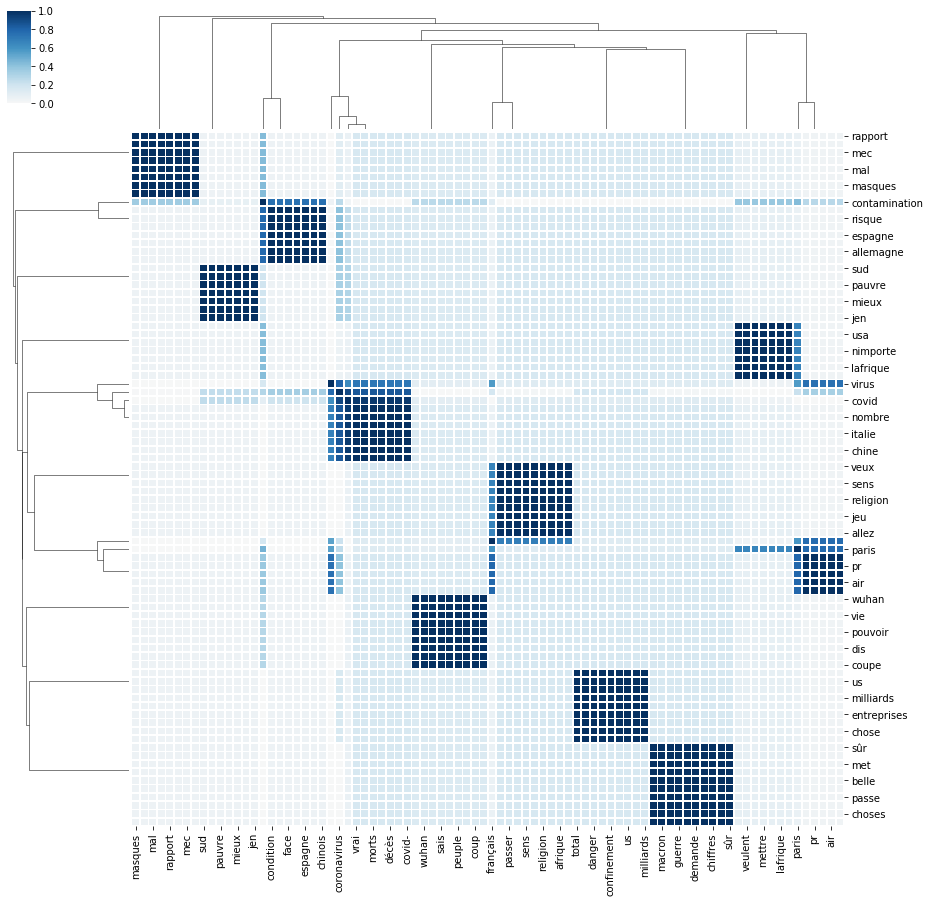

Wall time: 979 ms


In [30]:
%%time
from bidi.algorithm import get_display
import seaborn as sns

g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

Wall time: 4.4 s


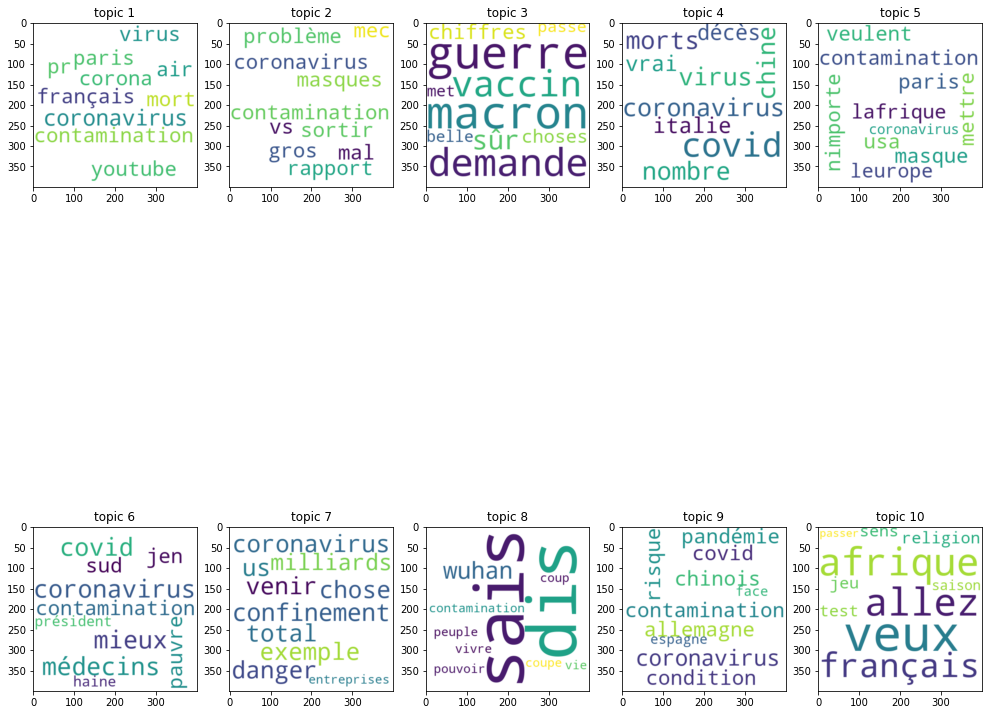

In [31]:
%%time
import re
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

values_topics = np.array([[x.split("*") for x in topics[1].split("+")] for topics in lda.show_topics(total_topics)])[:,:,0].astype("float")
words_topics = np.array([[x.split("*") for x in topics[1].split("+")] for topics in lda.show_topics(total_topics)])[:,:,1]
topicsWC = [" ".join([re.sub('[\"\' ]', '', w) for w in x]) for x in words_topics] 
fig, axs = plt.subplots(2, 5,figsize=(17,17))
i=0
for topic in topicsWC:
    #reshaped_text = arabic_reshaper.reshape(topic)
    artext = get_display(topic)
    wordcloud = WordCloud(width = 400, height = 400, background_color="white").generate(artext)
    axs[int(i/5), i%5].imshow(wordcloud, interpolation='bilinear')
    axs[int(i/5), i%5].set_title("topic "+str(i+1))
    i+=1

In [32]:
values_topics = np.array([[x.split('*') for x in topics[1].split("+")] for topics in lda.show_topics(total_topics)])[:,:,0].astype("float")
words_topics = np.array([[x.split('*') for x in topics[1].split('+')] for topics in lda.show_topics(total_topics)])[:,:,1]
topicsWC = [" ".join([re.sub('[\"\' ]', '', w) for w in x]) for x in words_topics]
import re
x = []
for w in topicsWC:
    z = re.split(r' ',w)
    x.append(z)
df = pd.DataFrame(x)
df = pd.Series(df.values.ravel('F'))
df = pd.DataFrame(df,columns=['topics']).drop_duplicates()


In [33]:
df.head(20)

,topics
0,coronavirus
1,contamination
2,macron
6,confinement
7,sais
9,veux
11,masques
12,guerre
13,covid
14,usa
